In [4]:
from matplotlib import pyplot as plt
import pandas as pd


In [30]:
root_dir = r"/home/chunming/data/chunming/projects/LSHMultivector/results/hamming_acc"
dataset = "scifact"
eval_file = r"{}/{}/eval_results/eval.csv".format(root_dir, dataset)
perf_path = r"{}/{}/perf_results".format(root_dir, dataset)

In [31]:
# Construct eval and perf pa
eval_results = pd.read_csv(eval_file)
eval_results["hash_dimension"] = eval_results["hash_dimmension"] 
perf_columns_title = ["hash_dimension","task_clock_all", "task_clock_encode","task_clock_retrieve"]
perf_all = []
for i in range(5,17):
    perf_file = r"{}/perf_{}.csv".format(perf_path, i)
    perf = pd.read_csv(perf_file, index_col=0)
    perf["task_clock_all"] = perf["encode_task_clock"] + perf["retrieval_task_clock"]
    ave_task_clock_all = round(float(perf["task_clock_all"].mean()) * 0.1**6, 3)
    encode_task_clock = round(float(perf["encode_task_clock"].mean()) * 0.1**6, 3)
    retrieval_task_clock = round(float(perf["retrieval_task_clock"].mean()) * 0.1**6, 3)
    perf_all.append([i, ave_task_clock_all, encode_task_clock, retrieval_task_clock])

perf_all_df = pd.DataFrame(perf_all, columns=perf_columns_title)
eval_df = pd.merge(eval_results, perf_all_df, how='left', left_index=False, right_index=False)
print(eval_df)

     nDCG@10     RR@10  Success@10  hash_dimmension  hash_dimension  \
0   0.634059  0.606992    0.760000                5               5   
1   0.629586  0.597566    0.763333                6               6   
2   0.615562  0.581144    0.763333                7               7   
3   0.616823  0.584107    0.760000                8               8   
4   0.607738  0.575700    0.746667                9               9   
5   0.602026  0.570044    0.743333               10              10   
6   0.580505  0.550218    0.716667               11              11   
7   0.547242  0.513639    0.686667               12              12   
8   0.573021  0.544549    0.713333               13              13   
9   0.558866  0.529402    0.706667               14              14   
10  0.541967  0.512294    0.673333               15              15   
11  0.542525  0.511431    0.690000               16              16   

    task_clock_all  task_clock_encode  task_clock_retrieve  
0         1216.

Text(0.5, 1.0, 'Performance of Different Hash Dimension: scifact')

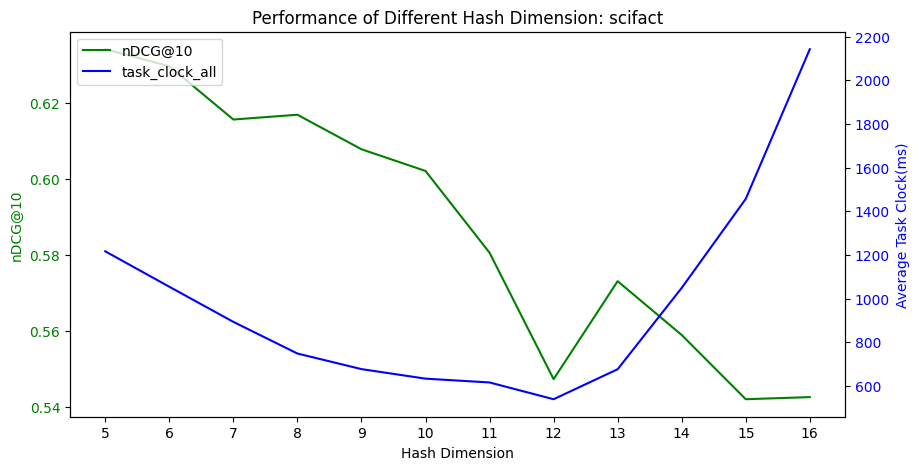

In [32]:
# 绘制nDCG@10的折线图
plt.figure(figsize=(10, 5))  # 设置图表大小
ax1 = plt.gca()  # 获取当前轴

ax1.plot(eval_df['hash_dimension'], eval_df['nDCG@10'], 'g-', label='nDCG@10')  # 绘制绿色折线
ax1.set_xlabel('Hash Dimension')  # 设置x轴标签
ax1.set_ylabel('nDCG@10', color='g')  # 设置y轴标签和颜色
ax1.tick_params(axis='y', labelcolor='g')  # 设置y轴刻度颜色

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制task_clock_all的折线图
ax2.plot(eval_df['hash_dimension'], eval_df['task_clock_all'], 'b-', label='task_clock_all')  # 绘制蓝色折线
ax2.set_ylabel('Average Task Clock(ms)', color='b')  # 设置y轴标签和颜色
ax2.tick_params(axis='y', labelcolor='b')  # 设置y轴刻度颜色

# 设置横坐标的间隔为1
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.set_xticks(range(min(eval_df['hash_dimension']), max(eval_df['hash_dimension']) + 1, 1))
# 设置图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title(r'Performance of Different Hash Dimension: {}'.format(dataset))  # 设置图表标题

Text(0.5, 1.0, 'Performance of Different Hash Dimension: scifact')

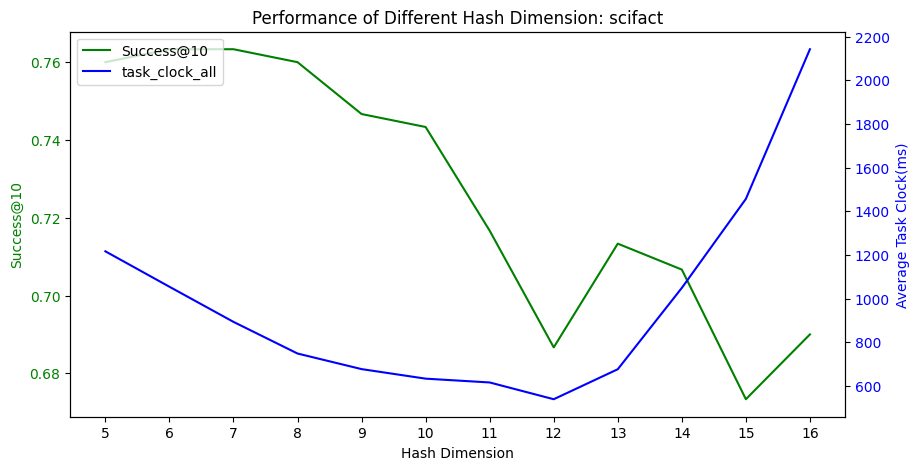

In [33]:
plt.figure(figsize=(10, 5))  # 设置图表大小
ax1 = plt.gca()  # 获取当前轴

ax1.plot(eval_df['hash_dimension'], eval_df['Success@10'], 'g-', label='Success@10')  # 绘制绿色折线
ax1.set_xlabel('Hash Dimension')  # 设置x轴标签
ax1.set_ylabel('Success@10', color='g')  # 设置y轴标签和颜色
ax1.tick_params(axis='y', labelcolor='g')  # 设置y轴刻度颜色

# 创建第二个y轴
ax2 = ax1.twinx()

# 绘制task_clock_all的折线图
ax2.plot(eval_df['hash_dimension'], eval_df['task_clock_all'], 'b-', label='task_clock_all')  # 绘制蓝色折线
ax2.set_ylabel('Average Task Clock(ms)', color='b')  # 设置y轴标签和颜色
ax2.tick_params(axis='y', labelcolor='b')  # 设置y轴刻度颜色

# 设置横坐标的间隔为1
ax1.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax1.set_xticks(range(min(eval_df['hash_dimension']), max(eval_df['hash_dimension']) + 1, 1))
# 设置图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title(r'Performance of Different Hash Dimension: {}'.format(dataset))  # 设置图表标题